In [39]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [40]:
# Loading the data 
digits = datasets.load_digits()

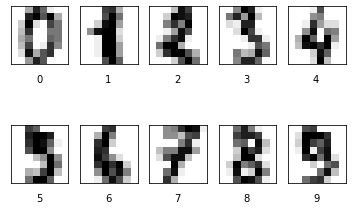

In [41]:
for i in range(1,11):
    # 行数，列数，索引值
    plt.subplot(2,5,i)
    # 参数：cmap 将标量数据映射到色彩图
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    # x, y : scalars 放置text的位置
    # s : str 内容text
    plt.text(3,10,str(digits.target[i-1]))
    # 设置x轴
    plt.xticks([])
    # 设置y轴
    plt.yticks([])
plt.show()

In [42]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25)

In [43]:
# 定义标签，大于5为1，小于5为0
y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [45]:
# 定义激活函数
def sigmoid(z):
    s = 1/(1 + np.exp(-1 * z))
    return s

In [46]:
import numpy as np
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


In [47]:
# 初始化参数
def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)
    b = 0

    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [48]:
initialize_parameters(2)

(array([[-0.07985286],
        [-1.33612638]]), 0)

In [49]:
# 前后向传播
def propagate(w,b,X,Y):

    m = X.shape[0]

    # A:1*1347
    A = sigmoid(np.dot(w.T, X.T) + b)
    cost = 0
    for i in range(len(Y)):
        k = A[0][i]
        if k == 1 or k == 0:
            cost += 0
        else:
            j = Y[i] * np.log(A[0][i]) + (1 - Y[i]) * np.log(1 - A[0][i])
            cost += j
    cost = (-1 / m) * cost
    dw = 1 / m * np.dot(X.T, (A.T - np.array(Y).reshape((len(Y),1))))
    db = 1 / m * sum(A[0][i] - Y[i] for i in range(len(Y)))
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    # 把shape中为1的维度去掉
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [50]:
# 梯度下降
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        w = w - 1 * dw * learning_rate
        b = b - 1 * db * learning_rate
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

In [51]:
# 预测
def predict(w, b, X):
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    
    A = sigmoid(np.dot(w.T, X.T) + b)
    
    for i in range(A.shape[1]):
        if A[0][i] > 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [52]:
# 构建模型
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    w, b = initialize_parameters(X_train.shape[1])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    w = params["w"]
    b = params["b"]
    d = {}
    d["w"] = w
    d["b"] = b
    d["cost"] = costs
    Y_train_predict = predict(w, b, X_train)
    Y_test_predict = predict(w, b, X_test)
    count_train = 0
    count_test = 0
    for i in range(len(Y_train)):
        if Y_train_predict[0][i] == Y_train[i]:
            count_train += 1
    for i in range(len(Y_test)):
        if Y_test_predict[0][i] == Y_test[i]:
            count_test += 1
    d["training_accuracy"] = count_train / len(Y_train)
    d["test_accuracy"] = count_test / len(Y_test)
    
    return d

In [53]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 1e-2,print_cost = True)
print(d)

{'w': array([[ 0.22716345],
       [ 0.34041685],
       [-0.72658766],
       [ 0.46179939],
       [-0.14184814],
       [ 0.40795423],
       [ 1.4712273 ],
       [ 1.47753155],
       [-0.04498703],
       [-0.53936878],
       [ 0.61178864],
       [ 0.37627589],
       [-0.04544453],
       [ 0.10304239],
       [-0.98149184],
       [ 0.58732966],
       [ 0.26972674],
       [ 0.25273268],
       [ 0.28641529],
       [-0.16605923],
       [-0.85143482],
       [-0.16027015],
       [-0.22524447],
       [ 0.07314009],
       [-0.8924739 ],
       [-0.40849925],
       [-0.1146791 ],
       [ 0.95184404],
       [-0.19834901],
       [ 0.5249815 ],
       [-0.58165976],
       [-0.96133936],
       [ 0.47061335],
       [-0.45340539],
       [-0.14127797],
       [ 0.3582338 ],
       [-0.15746858],
       [-0.21982165],
       [ 0.15509144],
       [-1.53723924],
       [ 0.35825566],
       [-0.09535257],
       [ 0.04462151],
       [ 0.26036676],
       [ 0.32134406],
    

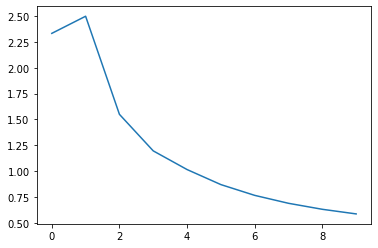

In [54]:
plt.plot(d['cost'])
plt.show()

In [55]:
d1 = model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 1e-2,print_cost = False)
d2 = model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 1e-4,print_cost = False)
d3 = model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 1e-6,print_cost = False)

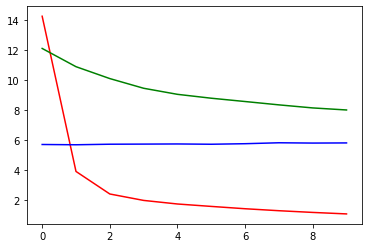

In [56]:
plt.plot(d1['cost'], color = 'red')
plt.plot(d2['cost'], color = 'green')
plt.plot(d3['cost'], color = 'blue')
plt.show()

In [57]:
d4 = model(X_train, y_train, X_test, y_test, num_iterations = 500, learning_rate = 1e-2,print_cost = False)
d5 = model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 1e-2,print_cost = False)
d6 = model(X_train, y_train, X_test, y_test, num_iterations = 5000, learning_rate = 1e-2,print_cost = False)
print('迭代{}次，测试准确率{}'.format('500',d4['test_accuracy']))
print('迭代{}次，测试准确率{}'.format('1000',d5['test_accuracy']))
print('迭代{}次，测试准确率{}'.format('5000',d6['test_accuracy']))

迭代500次，测试准确率0.8311111111111111
迭代1000次，测试准确率0.8555555555555555
迭代5000次，测试准确率0.9133333333333333
